In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

plt.style.use('seaborn')

In [33]:
try:
    data = pd.read_csv('test.acdc.dat', header=None, sep='\s+')
    data2 = pd.read_csv('test2.acdc.dat', header=None, sep='\s+')
except FileNotFoundError:
    print('No file')


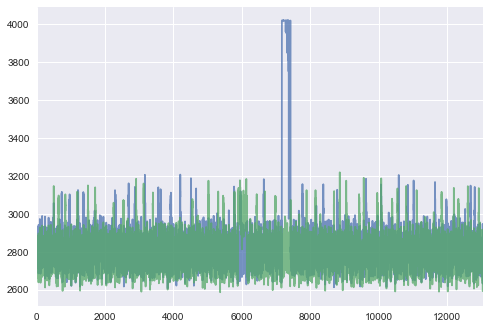

In [39]:
data[3].plot(alpha=.75)
data2[3].plot(alpha=0.75)

In [91]:
def discriminate_events(channel, start=0, width=256, save=False):
    chan = pd.DataFrame()
    for i in range(50):
        chan[i] = channel.loc[
            (start + i*width):((i+1)*width - 1 + start)
        ].get_values()
    
    if save:
        directory = 'event_data/'
        if not os.path.exists(directory):
            os.makedirs(directory)
#         print('{}{}'.format(directory,channel.name))
        chan.to_csv('{}{}.csv'.format(directory,channel.name))
    return chan

In [92]:
def plot_events(channel):
    directory = 'figs/'+channel.name
    if not os.path.exists(directory):
        os.makedirs(directory)
    for event in channel:
        fig = plt.figure()
        plt.plot(channel[event])
        plt.xlabel('Time Axis')
        plt.ylabel('ADC Counts')
        plt.title('Event: '+ str(event+1))
        plt.savefig('{}/event_{}'.format(directory, str(event+1)))
        plt.close()

In [94]:
chan = data2[3]
chan.name='3000-3250'
ch2 = discriminate_events(chan, save=True)
ch2.name = chan.name
plot_events(ch2)